### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable


### Loading the EIA dataset



In [2]:
eia_df = pd.read_excel("..\data_raw\Sales_Ult_Cust_2024.xlsx", sheet_name="States", header=[0,1,2])



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mahit\AppData\Local\Temp\ipykernel_33668\3837991887.py:1: SyntaxWarning: invalid escape sequence '\d'
  eia_df = pd.read_excel("..\data_raw\Sales_Ult_Cust_2024.xlsx", sheet_name="States", header=[0,1,2])


In [3]:
eia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 24 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   (Utility Characteristics, Unnamed: 0_level_1, Data Year)                           2816 non-null   object 
 1   (Utility Characteristics, Unnamed: 1_level_1, Utility Number)                      2815 non-null   float64
 2   (Utility Characteristics, Unnamed: 2_level_1, Utility Name)                        2815 non-null   object 
 3   (Utility Characteristics, Unnamed: 3_level_1, Part)                                2815 non-null   object 
 4   (Utility Characteristics, Unnamed: 4_level_1, Service Type)                        2815 non-null   object 
 5   (Utility Characteristics, Unnamed: 5_level_1, Data Type
O = Observed
I = Imputed)  2815 non-null   objec

In [4]:
# Comibining multi-level column names into single strings with underscores
new_columns = []

for col in eia_df.columns:
    col_name = ""

    for level in col:
        if str(level) != 'nan':
            if col_name == "":
                col_name = str(level).strip()
            else:
                col_name = col_name + "_" + str(level).strip()

    new_columns.append(col_name)
eia_df.columns = new_columns


In [5]:
eia_df.columns

Index(['Utility Characteristics_Unnamed: 0_level_1_Data Year',
       'Utility Characteristics_Unnamed: 1_level_1_Utility Number',
       'Utility Characteristics_Unnamed: 2_level_1_Utility Name',
       'Utility Characteristics_Unnamed: 3_level_1_Part',
       'Utility Characteristics_Unnamed: 4_level_1_Service Type',
       'Utility Characteristics_Unnamed: 5_level_1_Data Type\nO = Observed\nI = Imputed',
       'Utility Characteristics_Unnamed: 6_level_1_State',
       'Utility Characteristics_Unnamed: 7_level_1_Ownership',
       'Utility Characteristics_Unnamed: 8_level_1_BA Code',
       'RESIDENTIAL_Revenues_Thousand Dollars',
       'RESIDENTIAL_Sales_Megawatthours', 'RESIDENTIAL_Customers_Count',
       'COMMERCIAL_Revenues_Thousand Dollars',
       'COMMERCIAL_Sales_Megawatthours', 'COMMERCIAL_Customers_Count',
       'INDUSTRIAL_Revenues_Thousand Dollars',
       'INDUSTRIAL_Sales_Megawatthours', 'INDUSTRIAL_Customers_Count',
       'TRANSPORTATION_Revenues_Thousand Dollars'

In [6]:
#Cleaning up the column names
new_columns = []

for col in eia_df.columns:
    clean_col = col.replace('\n', ' ').strip()
    new_columns.append(clean_col)

eia_df.columns = new_columns

print(eia_df.columns.tolist())


['Utility Characteristics_Unnamed: 0_level_1_Data Year', 'Utility Characteristics_Unnamed: 1_level_1_Utility Number', 'Utility Characteristics_Unnamed: 2_level_1_Utility Name', 'Utility Characteristics_Unnamed: 3_level_1_Part', 'Utility Characteristics_Unnamed: 4_level_1_Service Type', 'Utility Characteristics_Unnamed: 5_level_1_Data Type O = Observed I = Imputed', 'Utility Characteristics_Unnamed: 6_level_1_State', 'Utility Characteristics_Unnamed: 7_level_1_Ownership', 'Utility Characteristics_Unnamed: 8_level_1_BA Code', 'RESIDENTIAL_Revenues_Thousand Dollars', 'RESIDENTIAL_Sales_Megawatthours', 'RESIDENTIAL_Customers_Count', 'COMMERCIAL_Revenues_Thousand Dollars', 'COMMERCIAL_Sales_Megawatthours', 'COMMERCIAL_Customers_Count', 'INDUSTRIAL_Revenues_Thousand Dollars', 'INDUSTRIAL_Sales_Megawatthours', 'INDUSTRIAL_Customers_Count', 'TRANSPORTATION_Revenues_Thousand Dollars', 'TRANSPORTATION_Sales_Megawatthours', 'TRANSPORTATION_Customers_Count', 'TOTAL_Revenues_Thousand Dollars', 'TOT

In [7]:
cols_to_keep = [
    'Utility Characteristics_Unnamed: 0_level_1_Data Year',
    'Utility Characteristics_Unnamed: 1_level_1_Utility Number',
    'Utility Characteristics_Unnamed: 2_level_1_Utility Name',
    'Utility Characteristics_Unnamed: 3_level_1_Part',
    'Utility Characteristics_Unnamed: 4_level_1_Service Type',
    'Utility Characteristics_Unnamed: 5_level_1_Data Type O = Observed I = Imputed',
    'Utility Characteristics_Unnamed: 6_level_1_State',
    'Utility Characteristics_Unnamed: 7_level_1_Ownership',
    'Utility Characteristics_Unnamed: 8_level_1_BA Code',
    'TOTAL_Revenues_Thousand Dollars',
    'TOTAL_Sales_Megawatthours',
    'TOTAL_Customers_Count'
]

eia_clean = eia_df[cols_to_keep].copy()

In [8]:
eia_clean.rename(columns={
    'Utility Characteristics_Unnamed: 0_level_1_Data Year': 'Year',
    'Utility Characteristics_Unnamed: 1_level_1_Utility Number': 'Utility Number',
    'Utility Characteristics_Unnamed: 2_level_1_Utility Name': 'Utility Name',
    'Utility Characteristics_Unnamed: 3_level_1_Part': 'Part',
    'Utility Characteristics_Unnamed: 4_level_1_Service Type': 'Service Type',
    'Utility Characteristics_Unnamed: 5_level_1_Data Type O = Observed I = Imputed': 'Data Type',
    'Utility Characteristics_Unnamed: 6_level_1_State': 'State',
    'Utility Characteristics_Unnamed: 7_level_1_Ownership': 'Ownership',
    'Utility Characteristics_Unnamed: 8_level_1_BA Code': 'BA Code',
    'TOTAL_Revenues_Thousand Dollars': 'Total Revenues',
    'TOTAL_Sales_Megawatthours': 'Total Sales',
    'TOTAL_Customers_Count': 'Total Customers'
}, inplace=True)


In [9]:
eia_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2816 non-null   object 
 1   Utility Number   2815 non-null   float64
 2   Utility Name     2815 non-null   object 
 3   Part             2815 non-null   object 
 4   Service Type     2815 non-null   object 
 5   Data Type        2815 non-null   object 
 6   State            2815 non-null   object 
 7   Ownership        2638 non-null   object 
 8   BA Code          2788 non-null   object 
 9   Total Revenues   2815 non-null   float64
 10  Total Sales      2815 non-null   float64
 11  Total Customers  2815 non-null   float64
dtypes: float64(4), object(8)
memory usage: 264.1+ KB


In [10]:
eia_clean.head()

,Year,Utility Number,Utility Name,Part,Service Type,Data Type,State,Ownership,BA Code,Total Revenues,Total Sales,Total Customers
0,2024,55.0,City of Aberdeen - (MS),A,Bundled,O,MS,Municipal,TVA,14946.0,190890.0,3330.0
1,2024,84.0,A & N Electric Coop,A,Bundled,O,MD,Cooperative,PJM,381.6,2793.0,295.0
2,2024,84.0,A & N Electric Coop,A,Bundled,O,VA,Cooperative,PJM,84042.9,705648.0,37341.0
3,2024,108.0,Adams-Columbia Electric Coop,A,Bundled,O,WI,Cooperative,MISO,80809.0,598848.0,39455.0
4,2024,113.0,"Agway Energy Services, LLC",B,Energy,O,MD,Retail Power Marketer,PJM,2.5,22.0,2.0


In [11]:
# Changing the datatype to numeric
eia_clean['Total Revenues'] = pd.to_numeric(eia_clean['Total Revenues'], errors='coerce')
eia_clean['Total Sales'] = pd.to_numeric(eia_clean['Total Sales'], errors='coerce')
eia_clean['Total Customers'] = pd.to_numeric(eia_clean['Total Customers'], errors='coerce')

print(eia_clean.dtypes)


Year                object
Utility Number     float64
Utility Name        object
Part                object
Service Type        object
Data Type           object
State               object
Ownership           object
BA Code             object
Total Revenues     float64
Total Sales        float64
Total Customers    float64
dtype: object


In [12]:
eia_clean.describe()

,Utility Number,Total Revenues,Total Sales,Total Customers
count,2815.000000,2.815000e+03,2.815000e+03,2.815000e+03
mean,35865.487744,1.827338e+05,1.623054e+06,6.437735e+04
std,28775.088718,7.533416e+05,5.899508e+06,2.627503e+05
min,55.000000,-6.026460e+05,-8.333489e+06,-5.172100e+05
25%,11272.500000,3.780500e+03,3.278350e+04,6.535000e+02
50%,19951.000000,2.959300e+04,2.664350e+05,8.052000e+03
75%,59620.000000,8.090500e+04,7.509200e+05,2.747950e+04
max,99999.000000,1.587469e+07,1.294157e+08,5.905174e+06


In [13]:
neg_rows = eia_clean[
    (eia_clean['Total Revenues'] < 0) |
    (eia_clean['Total Sales'] < 0) |
    (eia_clean['Total Customers'] < 0)
]

print("Number of rows with negative values:", len(neg_rows))

Number of rows with negative values: 47


In [14]:
# Removing rows where any of the key numeric columns have negative values
numeric_cols = ['Total Revenues', 'Total Sales', 'Total Customers']
eia_clean = eia_clean[(eia_clean[numeric_cols] >= 0).all(axis=1)]

print("Rows after removing negatives:", len(eia_clean))
print(eia_clean.describe())


Rows after removing negatives: 2768
       Utility Number  Total Revenues   Total Sales  Total Customers
count     2768.000000    2.768000e+03  2.768000e+03     2.768000e+03
mean     34776.515535    1.857824e+05  1.651023e+06     6.576013e+04
std      27767.229172    7.592126e+05  5.942911e+06     2.645572e+05
min         55.000000    0.000000e+00  0.000000e+00     0.000000e+00
25%      11183.000000    3.968800e+03  3.529775e+04     7.707500e+02
50%      19578.000000    3.043140e+04  2.727060e+05     8.384000e+03
75%      59579.000000    8.294438e+04  7.630005e+05     2.794325e+04
max      99999.000000    1.587469e+07  1.294157e+08     5.905174e+06


In [15]:
eia_clean.reset_index(drop=True, inplace=True)

In [16]:
eia_clean.isnull().sum()


Year                 0
Utility Number       0
Utility Name         0
Part                 0
Service Type         0
Data Type            0
State                0
Ownership          130
BA Code             26
Total Revenues       0
Total Sales          0
Total Customers      0
dtype: int64

In [17]:
eia_clean['State'].value_counts().head(10)


State
TX    182
PA    139
OH    138
IL    120
CA    119
NY    116
NJ    105
MD     97
TN     90
MA     90
Name: count, dtype: int64

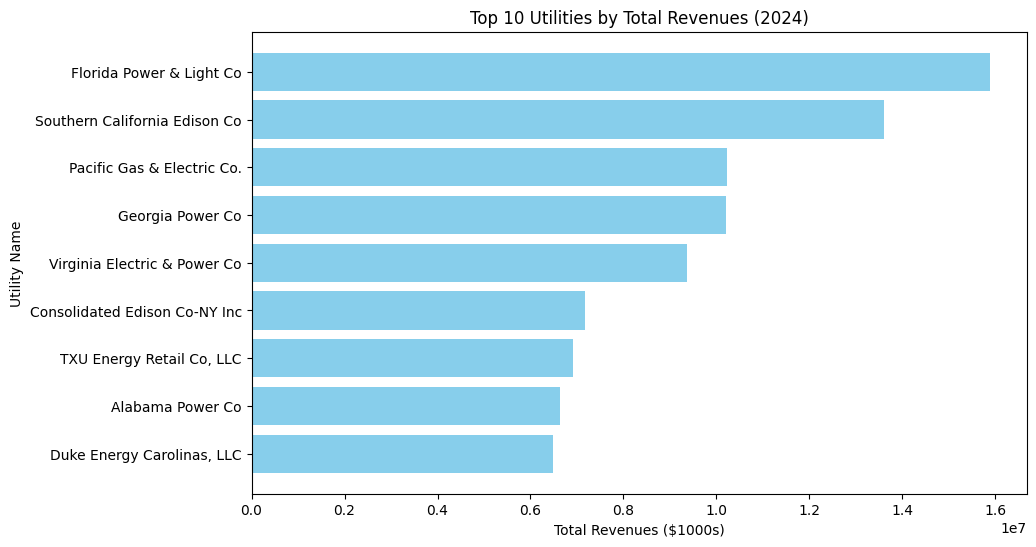

In [18]:
#visualizing the top utilities by total revenues
import matplotlib.pyplot as plt

top_utilities = eia_clean.nlargest(10, 'Total Revenues')
plt.figure(figsize=(10,6))
plt.barh(top_utilities['Utility Name'], top_utilities['Total Revenues'], color='skyblue')
plt.xlabel('Total Revenues ($1000s)')
plt.ylabel('Utility Name')
plt.title('Top 10 Utilities by Total Revenues (2024)')
plt.gca().invert_yaxis()  
plt.show()


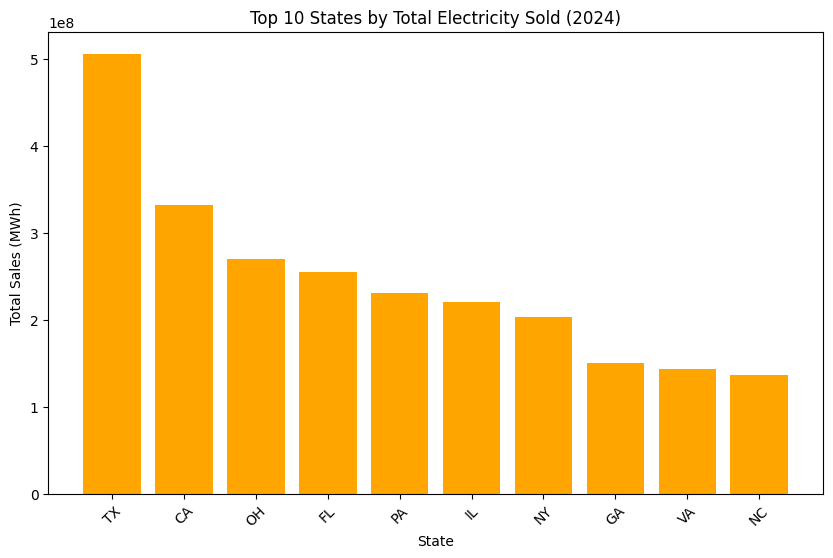

In [19]:
# Visualizing the top 10 states by total electricity sold
state_sales = eia_clean.groupby('State')['Total Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(state_sales.index, state_sales.values, color='orange')
plt.xlabel('State')
plt.ylabel('Total Sales (MWh)')
plt.title('Top 10 States by Total Electricity Sold (2024)')
plt.xticks(rotation=45)
plt.show()


In [20]:
eia_clean.to_csv(r"..\data_clean\eia_clean.csv", index=False)